# Laboratory work №2
## Predict sales of video games

Will work with dataset provided on https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
with fields: Name, Platform, Year_of_Release, Genre, Rublisher, NA_sales, EU_sales, JP_sales, Other_Sales,
Global_Sales, Critic_Score, Critic_Count, User_Score, User_Count and Rating.
The Global_Sales we will predict, so, we will solve regression problem.

In [1]:
from pandas import read_csv

### Introduction to data

Loading the dataset with the help of function `pandas.read_csv` in a `df` variable.
Display the first 5 lines to make sure the data is correctly read.

In [2]:
df = read_csv('Video_Game_Sales_as_of_Jan_2017.csv')
print df.shape
df.head()

(17416, 15)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


There are missing values.
The obvious solution is to exclude all data that have at least one missing value.
Let's do it.

In [3]:
df = df.dropna()

Select the target variable `Global_Sales` from the dataset and denote it by `y`.
Now `X` denotes training sample, `y` - answers on it.

In [4]:
X = df.drop('Global_Sales', 1)
y = df['Global_Sales']

### Processing of missing values

We can see that there are both numeric and categorical characteristics in the dataset. Get lists of their names

In [5]:
numeric_cols = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score',
                'Critic_Count', 'User_Score', 'User_Count', 'Global_Sales']
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

In [6]:
X_real = df[numeric_cols]
X_cat = (df[categorical_cols].fillna('NA')).astype(str)

So, we have real features, and with them we can work.
Let's look at the charts, how the target attribute depends on the rest.

In [7]:
from matplotlib.pyplot import subplots
%matplotlib inline

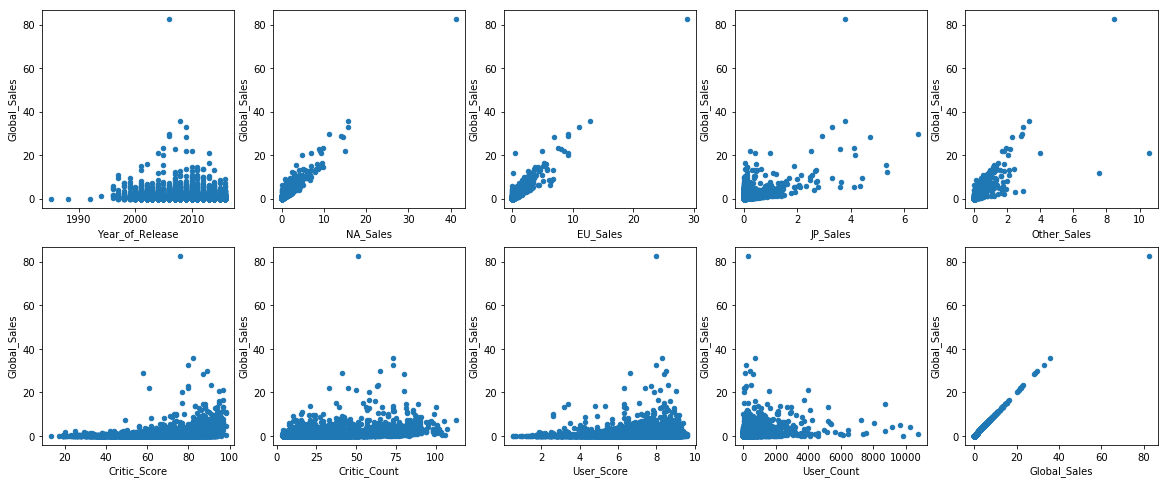

In [8]:
fig, axes = subplots(nrows=2, ncols=5, figsize=(20, 8))
for idx, feature in enumerate(X_real[:-1]):
    X_real.plot(feature, "Global_Sales", subplots=True, kind="scatter", ax=axes[idx / 5, idx % 5])

Let's more strictly estimate the level of linear dependence between the characteristics and the target variable.
A good measure of the linear relationship between the two vectors is the Pearson correlation.
In pandas, it can be calculated using two methods of a dataframe: `corr` and `corrwith`.
The `df.corr` method calculates the correlation matrix of all characteristics from the dataframe.
The `df.corrwith` method needs to submit one more dataframe as an argument,
and then it will calculate pairwise correlations between the characteristics of df and this dataframe.

In [9]:
X_real.drop('Global_Sales', 1).corrwith(df['Global_Sales'])

Year_of_Release    0.008973
NA_Sales           0.954936
EU_Sales           0.938461
JP_Sales           0.611947
Other_Sales        0.805426
Critic_Score       0.237317
Critic_Count       0.293247
User_Score         0.087918
User_Count         0.264916
dtype: float64

In the sample, there are features that correlate with the target,
and therefore the problem can be solved by linear methods.

The graphs show that some of the features are similar to each other.
Therefore, let us also calculate the correlation between the real characteristics.

In [10]:
corr = X_real.corr()
corr

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales
Year_of_Release,1.000000,-0.014685,0.043452,-0.034488,0.044025,-0.009776,0.196388,-0.253238,0.198600,0.008973
NA_Sales,-0.014685,1.000000,0.838223,0.465930,0.727575,0.234142,0.286298,0.085729,0.245816,0.954936
EU_Sales,0.043452,0.838223,1.000000,0.518536,0.718245,0.211855,0.267728,0.055010,0.284431,0.938461
JP_Sales,-0.034488,0.465930,0.518536,1.000000,0.393503,0.145799,0.171109,0.127092,0.073678,0.611947
Other_Sales,0.044025,0.727575,0.718245,0.393503,1.000000,0.191452,0.241974,0.056737,0.242044,0.805426
Critic_Score,-0.009776,0.234142,0.211855,0.145799,0.191452,1.000000,0.391951,0.583724,0.264328,0.237317
Critic_Count,0.196388,0.286298,0.267728,0.171109,0.241974,0.391951,1.000000,0.193658,0.361137,0.293247
User_Score,-0.253238,0.085729,0.055010,0.127092,0.056737,0.583724,0.193658,1.000000,0.018876,0.087918
User_Count,0.198600,0.245816,0.284431,0.073678,0.242044,0.264328,0.361137,0.018876,1.000000,0.264916
Global_Sales,0.008973,0.954936,0.938461,0.611947,0.805426,0.237317,0.293247,0.087918,0.264916,1.000000


On the diagonals, as it should be, there are only units.
However, there are strongly correlated columns in the matrix: NA_Sales, EU_Sales, JP_Sales, Other Sales and Global_Sales (the last one is the sum of others).
Further we will see that this fact negatively affects the learning of the linear model.

So, in our data, there are very similar features.
Of course, we could remove duplicates at once,
but let's see how the model would have been trained if we had not noticed this problem.

Training Lasso regressor with default parameters.

In [11]:
from sklearn.linear_model import Lasso

In [12]:
# Training a linear model with L1-regularization and output weights
# (weights are stored in the coef_ variable of the regressor class).
# We can output pairs (feature name, weight) using the zip function built into the python language
# Feature names are stores in df.columns variable
regressor = Lasso()
regressor.fit(X_real, y)
for pair in zip(X_real.columns, regressor.coef_):
    print pair[0], pair[1]

Year_of_Release -0.0
NA_Sales 0.0
EU_Sales 0.0
JP_Sales 0.0
Other_Sales 0.0
Critic_Score 0.000266856876338
Critic_Count 0.00360106138115
User_Score 0.0
User_Count 0.000210177588237
Global_Sales 0.705533516582


L1-regularization nullifies weights at some features.
So we may not consider features with zero weights.
Taking into account colleration matrix we will left only `Year_of_Release` from real features.

In [13]:
X_real = X_real[['Year_of_Release']]

### Transformation of categorical features

In the previous cell we divided our data set into two parts: one contains only numerical characteristics,
the other only categorical ones.
It will be necessary for us for further separate processing of this data.

To use the regression model, we need to convert the categorical characteristics into numerical once.
Let's consider the basic way of transformation of the categorical attributes in numerical: one-hot encoding.
Its idea is that we transform the categorical attribute by means of a binary code:
we assign a set of zeros and ones to each category.

In [14]:
from sklearn.feature_extraction import DictVectorizer as DV

encoder = DV(sparse = False)
X_cat = encoder.fit_transform(X_cat.T.to_dict().values())

In [15]:
regressor.fit(X_cat, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
if regressor.coef_.all() == 0:
    print 'All weights are equal to 0'

All weights are equal to 0


Let's consider only `Genge` feature from categorical columns.

In [17]:
X_cat = X[['Genre']]

Getting names of genres that will be used as names of columns in Data Frame:

In [18]:
genres = []
for element in X_cat['Genre']:
    if element not in genres:
        genres.append(element)

Converting categorical column into numerical one:

In [19]:
X_cat = encoder.fit_transform(X_cat.T.to_dict().values())

Creating Data Frame from transformed categorical data:

In [20]:
from pandas import DataFrame, concat

In [21]:
X_cat = DataFrame(data=X_cat, columns=genres)

Aggregation of samples:

In [22]:
X = concat([X_real, X_cat, y], axis=1, join_axes=[X_real.index]).fillna(0)

In [23]:
X.head()

,Year_of_Release,Sports,Racing,Platform,Misc,Action,Puzzle,Shooter,Fighting,Simulation,Role-Playing,Adventure,Strategy,Global_Sales
0,2006.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,82.54
2,2008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.57
3,2009.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.78
6,2006.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,29.81
7,2006.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.92


Removing rows with no genre:

In [24]:
no_genre = X[X[genres].sum(axis=1) == X['Year_of_Release']]

In [25]:
X = X[~X.isin(no_genre)].dropna()

Choosing rows with small `Global_Sales < 1` and scaling `Year_of_Release`:

In [26]:
X = X[X['Global_Sales'] < 1]

In [27]:
y = X['Global_Sales']
X = X.drop(['Global_Sales'], axis=1)
X['Year_of_Release'] -= X['Year_of_Release'].min()
X['Year_of_Release'] /= X['Year_of_Release'].max()

So, we have real and transformed categorical features, and with all of them we can work.

We need to divide the dataset into learning and test samples.

In [28]:
from sklearn.cross_validation import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0)

/opt/conda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [30]:
predictions = regressor.predict(X_test)

In [31]:
print predictions[:5]

[ 0.08448649  0.46        0.08520619  0.08448649  0.39466667]


In [32]:
from numpy import array, arange

In [33]:
y_test = array(y_test)

In [34]:
print y_test[:5]

[ 0.2   0.48  0.11  0.13  0.26]


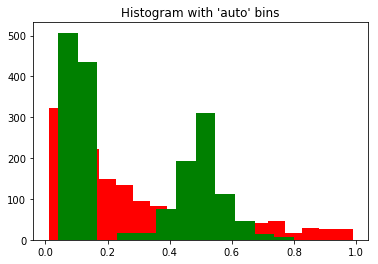

In [35]:
import matplotlib.pyplot as plt
plt.hist(y_test, bins='auto', color='red')
plt.hist(predictions, bins='auto', color='green')
plt.title("Histogram with 'auto' bins")
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
print mean_squared_error(y_test, predictions)

0.0235575237721


In [38]:
from sklearn.cross_validation import cross_val_score

In [39]:
from sklearn.metrics import make_scorer

In [40]:
scorer = make_scorer(mean_squared_error)

In [41]:
print cross_val_score(regressor, X_train, y_train, scoring=scorer).mean()

0.0267176256118


The algorithm turned out to be bad (despite the fact that the error is small enough).
One of the reasons is that the discrete features were represented by real.
Also weights of all features (using Lasso regression) are close to zero,
so choosing of informative features could be not good.
Another problem is that a priori distribution of the required feature is exponential, and the algorithm is designed for a bimodal normal distribution.

## Fuzzy logic

Let’s create a fuzzy control system which models sales predictions of a video game.
We consider a year and genre, rated between 0 and 10.

We would formulate this problem as:

**Antecednets (Inputs)**

*Year_of_Release*
- Universe: How good was the year or game release, on a scale of 0 to 10?
- Fuzzy set: poor, acceptable, amazing

*Genre*
- Universe: How good was game genre, on a scale of 0 to 10?
- Fuzzy set: bad, decent, great

**Consequents (Outputs)**

*tip*
- Universe: How much will be game sales, on a scale of 0 to 100
- Fuzzy set: low, medium, high

**Rules**
- IF the year was good or the game genre was good, THEN the sales will be high.
- IF the genre was average, THEN the sales will be medium.
- IF the year was poor and the game genre was poor THEN the sales will be low.

We can use the skfuzzy control system API to model this.
First, let’s define fuzzy variables.

In [42]:
from skfuzzy.control import Antecedent, Consequent, Rule, ControlSystem, ControlSystemSimulation
from skfuzzy import trimf

In [43]:
# New Antecedent/Consequent objects hold universe variables and membership functions
year = Antecedent(arange(0, 11, 1), 'year')
genre = Antecedent(arange(0, 11, 1), 'genre')
sales = Consequent(arange(0, 101, 1), 'sales')

# Auto-membership function population is possible with .automf(3, 5, or 7)
year.automf(3)
genre.automf(3)

# Custom membership functions can be built interactively with a familiar, Pythonic API
sales['low'] = trimf(sales.universe, [0, 0, 13])
sales['medium'] = trimf(sales.universe, [0, 13, 25])
sales['high'] = trimf(sales.universe, [13, 25, 25])

To help understand what the membership looks like, use the `view` methods.

In [44]:
%matplotlib inline

/opt/conda/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


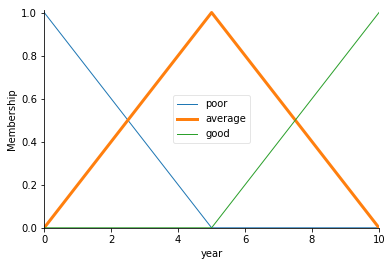

In [45]:
# We can see how these look with .view()
year['average'].view()

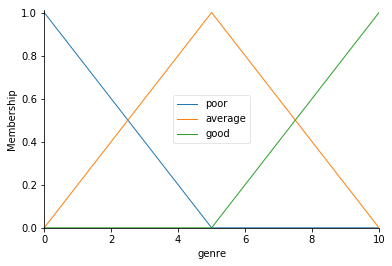

In [46]:
genre.view()

### Fuzzy rules
Now, to make these triangles useful, we define the fuzzy relationship between input and output variables.
For the purposes of our example, consider three simple rules:
- If the year is poor OR the genre is poor, then the sales will be low
- If the genre is average, then the sales will be medium
- If the year is good OR the year is good, then the sales will be high.

Most people would agree on these rules, but the rules are fuzzy.
Mapping the imprecise rules into a defined, actionable tip is a challenge.
This is the kind of task at which fuzzy logic excels.

(<matplotlib.figure.Figure at 0x7f8be0057990>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8bcffc2710>)

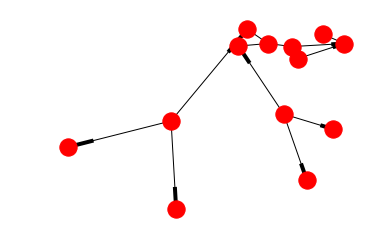

In [47]:
rule1 = Rule(year['poor'] | genre['poor'], sales['low'])
rule2 = Rule(genre['average'], sales['medium'])
rule3 = Rule(year['good'] | genre['good'], sales['high'])

rule1.view()

### Control System Creation and Simulation

Now that we have our rules defined, we can simply create a control system via:

In [48]:
sales_control = ControlSystem([rule1, rule2, rule3])

In order to simulate this control system, we will create a `ControlSystemSimulation`.
Think of this object representing our controller applied to a specific set of cirucmstances.

In [49]:
sales_sim = ControlSystemSimulation(sales_control)

We can now simulate our control system by simply specifying the inputs and calling the compute method.
Suppose we rated the year 6.5 out of 10 and the genre 9.8 of 10.

In [50]:
years = X['Year_of_Release'] * 10

In [51]:
X.drop('Year_of_Release', axis=1).sum(axis=0)

Sports          654.0
Racing          122.0
Platform        147.0
Misc            145.0
Action          150.0
Puzzle           49.0
Shooter         210.0
Fighting        280.0
Simulation      305.0
Role-Playing    110.0
Adventure       369.0
Strategy        115.0
dtype: float64

In [52]:
genre = encoder.inverse_transform(X[genres])

In [57]:
names = []
for element in genre:
    names.append(element.keys())

In [70]:
game_genres = []
for element in names:
    for x in element:
        game_genres.append(x[6:])

In [71]:
poor_genres = ['Puzzle', 'Role-Playing', 'Strategy', 'Racing']
average_genres = ['Misc', 'Platform', 'Action', 'Shooter']
good_genred = ['Fighting', 'Simulation', 'Adventure', 'Sports']

In [78]:
genres = []
for element in game_genres:
    if element in poor_genres:
        genres.append(1)
    elif element in average_genres:
        genres.append(5)
    else:
        genres.append(10)

In [93]:
years = array(years)

In [94]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
sales_sim.input['year'] = years[0]
sales_sim.input['genre'] = genres[0]

# Crunch the numbers
sales_sim.compute()

Once computed, we can view the result as well as visualize it.

Year: 4.83870967742, genre: 5, sales: 12.6507731959


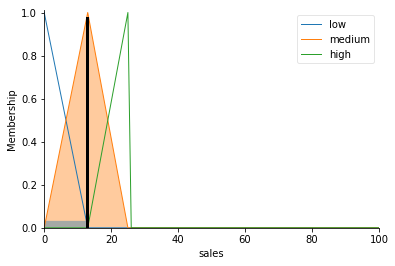

In [99]:
print 'Year: {}, genre: {}, sales: {}'.format(years[0], genres[0], sales_sim.output['sales'])
sales.view(sim=sales_sim)